### Face detection using CNN

In [1]:
#pip install numpy==1.26.2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
%matplotlib inline

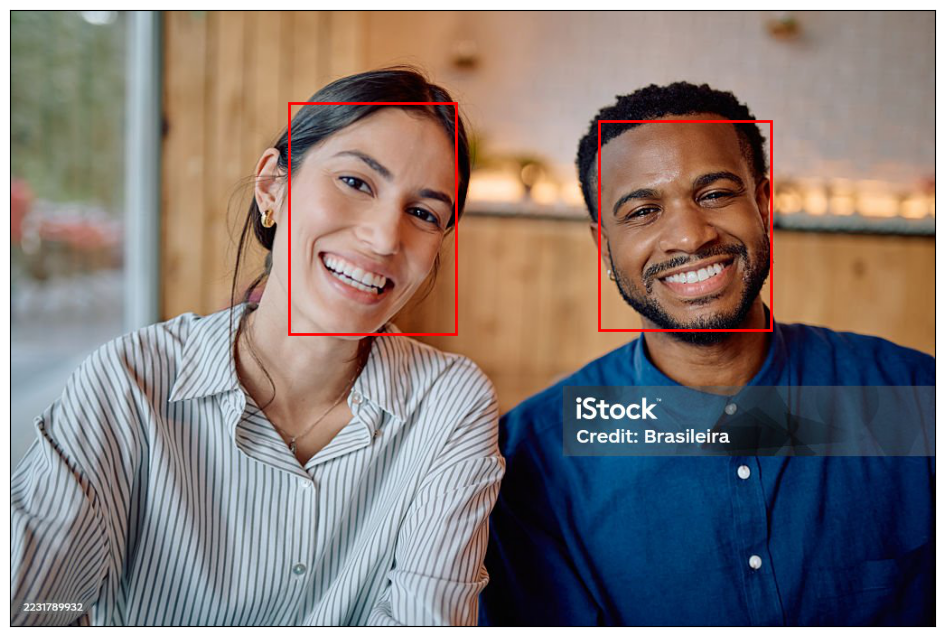

In [5]:
image = plt.imread("images/photo.jpg")
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"xticks": [], "yticks": []})
ax.imshow(image)

detector = MTCNN()
faces = detector.detect_faces(image)

for face in faces:
    x, y, w, h = face["box"]
    rect = plt.Rectangle((x, y), w, h, fill=False, color="r", linewidth=2)
    ax.add_patch(rect)

In [ ]:
faces #you can bypass faces via in face size or confidence threshold

[{'box': [652, 122, 190, 232],
  'confidence': 0.9996225833892822,
  'keypoints': {'nose': [753, 254],
   'mouth_right': [806, 276],
   'right_eye': [783, 205],
   'left_eye': [701, 223],
   'mouth_left': [715, 295]}},
 {'box': [308, 103, 185, 255],
  'confidence': 0.9978919625282288,
  'keypoints': {'nose': [412, 262],
   'mouth_right': [423, 304],
   'right_eye': [458, 227],
   'left_eye': [384, 191],
   'mouth_left': [342, 267]}}]

In [1]:
## Extract Faces from the photos
import numpy as np
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN

def extract_faces(input_file, min_confidence=0.9, crop=True):
    pil_image = Image.open(input_file)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
    pil_image.info['exif'] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    image = np.array(pil_image)

    # find faces in the image
    detector = MTCNN()
    faces = detector.detect_faces(image)
    faces = [face for face in faces if face['confidence'] >= min_confidence]
    results = []

    for face in faces:
        x1, y1, w, h = face['box']

        if (crop):
            #C Compute crop coordinates
            if w > h:
                x1 = x1 + ((w - h)// 2)
                w = h
            elif h > w:
                y1 = y1 + ((h - w)// 2)
                h = w
        # Extract the facial image and ad it to the list
        x2 = x1 + w
        y2 = y1 + h
        results.append(Image.fromarray(image[y1:y2, x1:x2]))

    return results
    

In [4]:
# Extract faces and save them in the same directory
faces = extract_faces('images/faces.jpg')

for i, face in enumerate(faces):
    face.resize((224, 224)).save(f'images/faces/face_{i}.png')